In [254]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, auc, precision_score, precision_recall_curve,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Step 01: Fetch data 

In [603]:
dt = pd.read_csv('customer-churn.csv')

## Step 02 Gettting ready for Model 

1. select feature set 

In [604]:
dt.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [605]:
selected_features = ['tenure','MonthlyCharges']#,'SeniorCitizen']#,'Contract']#,'Partner']

2. Encoding 

In [606]:
## Mannual encoding for target variables #
dt['Churn'] = dt['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [607]:
## One hot encoding 
contract_dummies = pd.get_dummies(dt['Contract'])
dt = pd.concat([dt,contract_dummies],axis=1)

In [608]:
## Mannual encoding for features ## 
for i in selected_features:
    if i in ['TechSupport','Partner']:
        dt[i] = dt[i].apply(lambda x: 1 if x=='Yes' else 0)
    elif i in ['InternetService','Contract']:
        dt[i] = dt[i].apply(lambda x: 1 if (x=='DSL') | (x=='Month-to-month')  else (2 if (x=='Fiber optic') | (x=='One year') else 0))
    

3. Splitting 

In [609]:
X = dt[selected_features]
Y = dt['Churn']

In [610]:
train_X,test_X, train_Y, test_Y = train_test_split(X,Y)

## Step 03 Machine learning Model 
- First Iteration (logistic Regression)

In [611]:
model = LogisticRegression(n_jobs=6)

In [612]:
model.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=6, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [613]:
model.coef_

array([[-0.05586837,  0.03323334]])

## Step 04 Validate Model 

In [614]:
prediction = model.predict(test_X)

1. Accuracy. 

In [615]:
round(accuracy_score(test_Y, prediction)*100,2)

77.74

2. Precision. 

In [616]:
round(precision_score(test_Y, prediction)*100,2)

60.98

3. Recall. 

In [617]:
round(recall_score(test_Y, prediction)*100,2)

43.1

4. Confusion Matrix

In [618]:
confusion_matrix(test_Y,prediction)

array([[1169,  128],
       [ 264,  200]])

In [619]:
np.unique(prediction,return_counts=True)

(array([0, 1]), array([1433,  328]))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.801


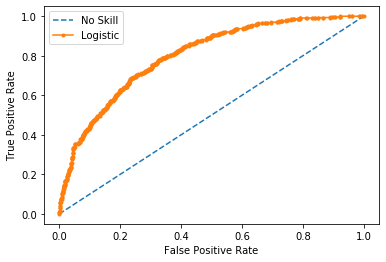

In [620]:
ns_probs = [0 for _ in range(len(test_Y))]
# predict probabilities
lr_probs = model.predict_proba(test_X)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(test_Y, ns_probs)
lr_auc = roc_auc_score(test_Y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_Y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_Y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Model Analysis:

- How many were actually going to churn and how many our model predicted? 

In [621]:
model_dt = pd.DataFrame({'Actual':test_Y, 'Predicted':prediction})

Text(0.5, 1.0, 'Predicted')

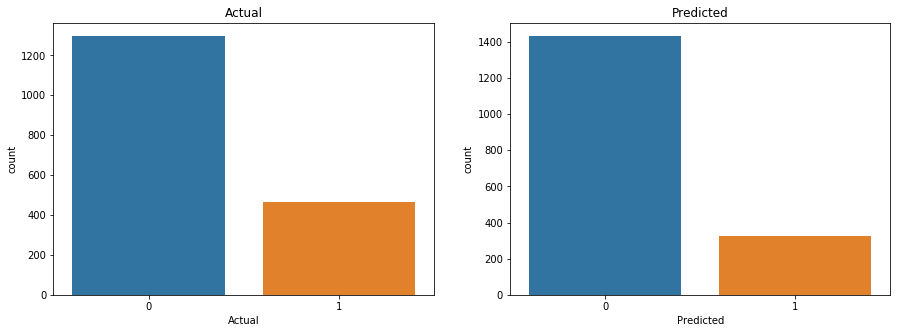

In [622]:
fig, ax = plt.subplots(figsize=(15,5),ncols=2)
sns.countplot('Actual',data=model_dt, ax=ax[0])
ax[0].set_title('Actual')
sns.countplot('Predicted',data=model_dt, ax=ax[1])
ax[1].set_title('Predicted')

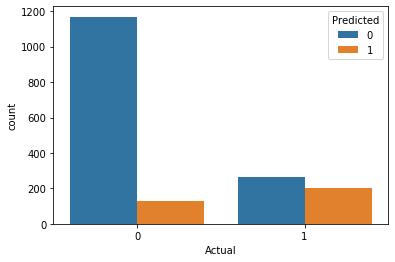

In [623]:
sns.countplot('Actual',hue='Predicted',data=model_dt)

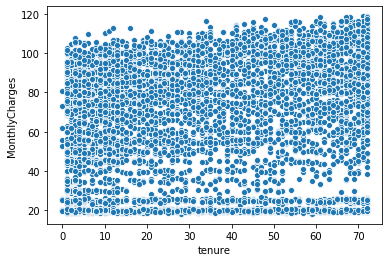

In [624]:
sns.scatterplot(x='tenure',y='MonthlyCharges',data=dt)


In [677]:
x_value=[0,20,40,60,80]

In [693]:
sample.sort_values(by=['tenure'],inplace=True)

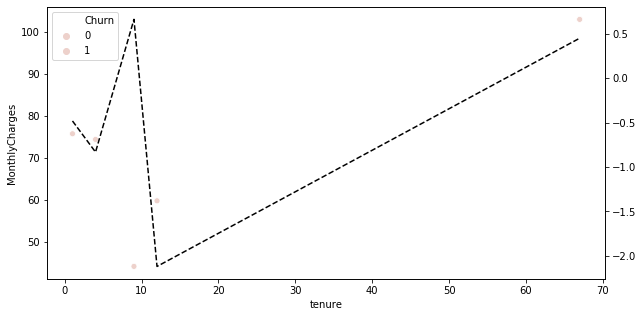

In [694]:
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
sns.scatterplot(sample['tenure'],sample['MonthlyCharges'],hue=sample['Churn'],ax=ax)
plt.plot(sample['tenure'], y_value, '--', color='black')
#sns.lineplot(agg['tenure'],agg['LG_line'],ax=ax2,color='black',linewidth=2)


In [665]:
y_value

[-0.4817491821930431,
 -0.8325841170369115,
 0.6628746301588733,
 -2.120491173870248,
 0.45040450936485543]

In [691]:
def calculate_y(intercept,tenure,monthly_charges,slope):
    y = []
    for i in range(len(tenure)):
        y.append((intercept+slope[0]*tenure[i]+slope[1]*monthly_charges[i])[0])
    return y

In [664]:
y_value = calculate_y(model.intercept_,tenure=[12,9,1,67,4],monthly_charges=[59.8,44.2,75.75,102.95,74.4],slope=model.coef_[0] )

In [634]:
values = sample_X.values
slope = model.coef_[0]
intercept = model.intercept_

In [635]:
values

array([[ 12.  ,  59.8 ],
       [  9.  ,  44.2 ],
       [  1.  ,  75.75],
       [ 67.  , 102.95],
       [  4.  ,  74.4 ]])

In [638]:
model.intercept_

array([-1.79868225])

In [639]:
model.coef_

array([[-0.05586837,  0.03323334]])

In [641]:
-1.7986+(-0.05586*12)+(0.0332*59.8)

-0.48355999999999977

In [709]:
churners = dt[dt['Churn']==1]

In [712]:
sample = churners[['tenure','MonthlyCharges','Churn']].tail(5)
sample.sort_values(by=['tenure'],inplace=True)
sample_X = sample.iloc[:,:2]
sample_Y = sample.iloc[:,2:]

In [713]:
sample_X

,tenure,MonthlyCharges
7032,1,75.75
7041,4,74.40
7026,9,44.20
7021,12,59.80
7034,67,102.95


In [714]:
model.coef_

array([[-0.05586837,  0.03323334]])

In [715]:
model.intercept_

array([-1.79868225])

In [716]:
model.decision_function(sample_X)

array([ 0.66287463,  0.45040451, -0.83258412, -0.48174918, -2.12049117])

In [717]:
score = (-1.79868225 + 4*-0.05586837 + 74.40*0.03323334)

In [718]:
score

0.45040476600000057

In [719]:
import math

In [720]:
(1/(1+(math.e**-score)))

0.6107354663814986

In [721]:
model.predict(sample_X)

array([1, 1, 0, 0, 0])

In [722]:
model.intercept_

array([-1.79868225])

__Observations__:
1. Our model performing well on non-churner although there are false positive but that percentage is low. 
2. Our model is worse on predicting the churner. The percentage of false negative is higher than true negative. 
3. The model is having tough time to define the line to separate the churners that's why the false negative rate is high. i.e  model is predicting non-churners as churner. 

## Step 03 Machine learning Model 
- Second Iteration (Decision Tree)

In [239]:
model = DecisionTreeClassifier()

In [240]:
model.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Step 04 Validate Model 

In [241]:
prediction = model.predict(test_X)

1. Accuracy. 

In [242]:
round(accuracy_score(test_Y, prediction)*100,2)

72.91

2. Precision. 

In [243]:
round(precision_score(test_Y, prediction)*100,2)

49.79

3. Recall. 

In [244]:
round(recall_score(test_Y, prediction)*100,2)

50.53

4. Confusion Matrix

In [245]:
confusion_matrix(test_Y,prediction)

array([[1044,  242],
       [ 235,  240]])

Model Analysis:

- How many were actually going to churn and how many our model predicted? 

In [246]:
model_dt = pd.DataFrame({'Actual':test_Y, 'Predicted':prediction})

Text(0.5, 1.0, 'Predicted')

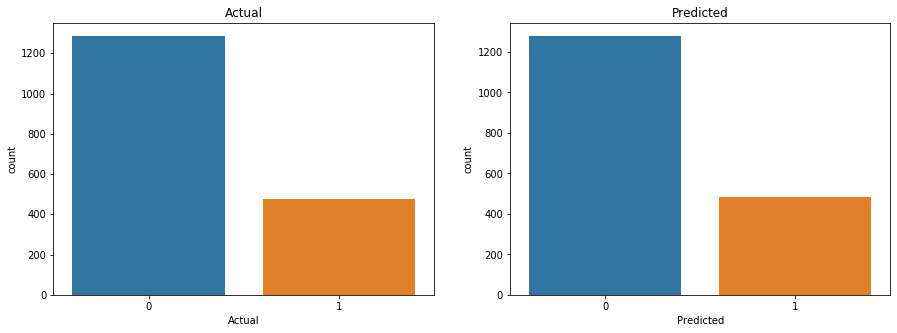

In [247]:
fig, ax = plt.subplots(figsize=(15,5),ncols=2)
sns.countplot('Actual',data=model_dt, ax=ax[0])
ax[0].set_title('Actual')
sns.countplot('Predicted',data=model_dt, ax=ax[1])
ax[1].set_title('Predicted')

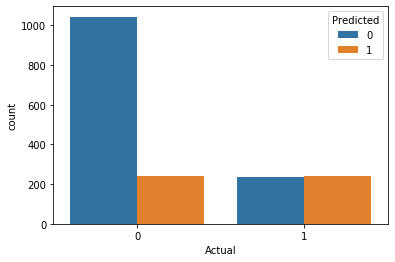

In [248]:
sns.countplot('Actual',hue='Predicted',data=model_dt)

__Observations__:
1. Our model performing well on non-churner although there are false positive but that percentage is low. 
2. Our model is worse on predicting the churner. The percentage of false negative is higher than true negative. 
3. The model is having tough time to define the line to separate the churners that's why the false negative rate is high. i.e  model is predicting non-churners as churner. 

## Baseline Model

In [56]:
prediction = []
for i in range(len(test_Y)):
    prediction.append(0)

In [57]:
accuracy_score(test_Y,prediction)*100

72.7427597955707

In [58]:
precision_score(test_Y,prediction)*100

/home/sehan/Documents/Jupyter-notebook/my_jupyter_notebook_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [59]:
recall_score(test_Y,prediction)*100

0.0

In [60]:
confusion_matrix(prediction,test_Y)

array([[1281,  480],
       [   0,    0]])